In [2]:
!pip install neupy

     |████████████████████████████████| 226 kB 5.1 MB/s 
     |████████████████████████████████| 92.7 MB 1.1 MB/s 
     |████████████████████████████████| 3.2 MB 30.3 MB/s 
     |████████████████████████████████| 367 kB 61.3 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
  Attempting uninstall: progressbar2
    Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progre

In [12]:
import numpy as np
import pandas as pd
import math
import sklearn.metrics
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

import sys
from neupy.algorithms import PNN, GRNN

In [4]:
def elipse(a, b, t, x0, y0, k):
  x = a * math.cos(t) + x0
  y = b * math.sin(t) + y0
  return x, y, k

def parabole(p, t, x0, y0):
  x=t*t/(2*p)+x0
  y=t+y0
  return x, y, 2

In [9]:
X1 = []

for i in range(60):
  t = random.uniform(0, 2 * math.pi)
  X1.append(elipse(0.4, 0.4, t, -0.1, 0.15, 0))

for i in range(100):
  t = random.uniform(0, 2 * math.pi)
  X1.append(elipse(0.7, 0.7, t, 0, 0, 1))

for i in range(120):
  t = random.uniform(0, 2 * math.pi)
  X1.append(parabole(-1, t, 0.8, 0))

In [10]:
df = pd.DataFrame(X1, columns =['x', 'y', 'class'])

In [13]:
df = shuffle(df)

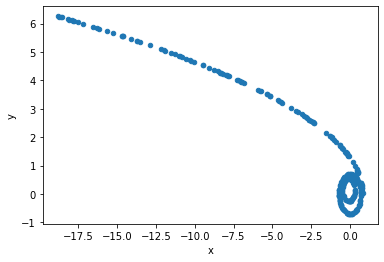

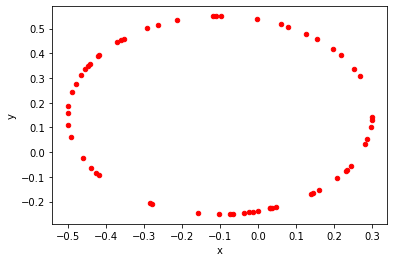

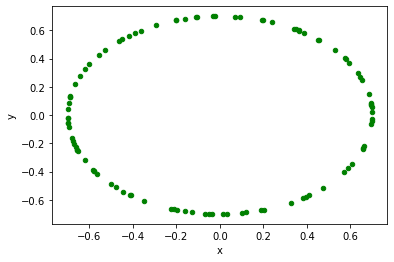

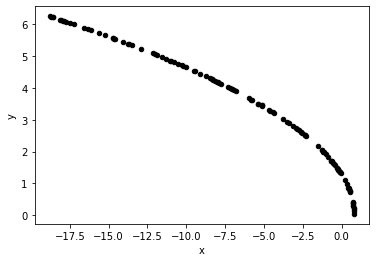

In [14]:
df.plot.scatter(x="x", y="y");
df[df['class'] == 0].plot.scatter(x="x", y="y", color = 'red');
df[df['class'] == 1].plot.scatter(x="x", y="y", color = 'green');
df[df['class'] == 2].plot.scatter(x="x", y="y", color = 'black');

In [19]:
y = df['class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df[['x', 'y']], y, test_size=0.2, random_state=42)

In [46]:
SPREAD = 0.3
model = PNN(verbose = True, std=SPREAD)
model.fit(X_train, y_train)


Main information

[ALGORITHM] PNN

[OPTION] batch_size = 128
[OPTION] std = 0.3
[OPTION] verbose = True



PNN(verbose=True, std=0.3, batch_size=128)

In [47]:
pred = model.predict(X_train)
print(accuracy_score(y_train, pred))

Time: 0:00:00 |N/A%|                                           | ETA:  --:--:--

0.8928571428571429


In [48]:
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.875


In [49]:
from matplotlib.colors import ListedColormap

def draw(model):
  plt.figure(figsize=(15,8))
  eps = 0.1
  xx, yy = np.meshgrid(np.linspace(-1.2, 1.2, 200),
                      np.linspace(-1.2, 1.2, 200))
  F = np.c_[xx.ravel(), yy.ravel()]
  Z = np.array([])
  s = model.predict(F)
  Z = np.append(Z, s)
  Z = Z.reshape(xx.shape)
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#2715ea', '#20bb42'])
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

  X1 = []
  Y1 = []
  for i in range(60):
    t = random.uniform(0, 2 * math.pi)
    x, y, k = elipse(0.4, 0.4, t, -0.1, 0.15, 0)
    X1.append(x)
    Y1.append(y)
  plt.scatter(X1, Y1, c = "red")

  X1 = []
  Y1 = []
  for i in range(100):
    t = random.uniform(0, 2 * math.pi)
    x, y, k = elipse(0.7, 0.7, t, 0, 0, 1)
    X1.append(x)
    Y1.append(y)
  plt.scatter(X1, Y1, c = "black")

  X1 = []
  Y1 = []
  for i in range(120):
    t = random.uniform(-1.2,1.2)
    x, y, k = parabole(-1, t, 0.8, 0)
    X1.append(x)
    Y1.append(y)
  plt.scatter(X1, Y1, c = "green")
  plt.show()

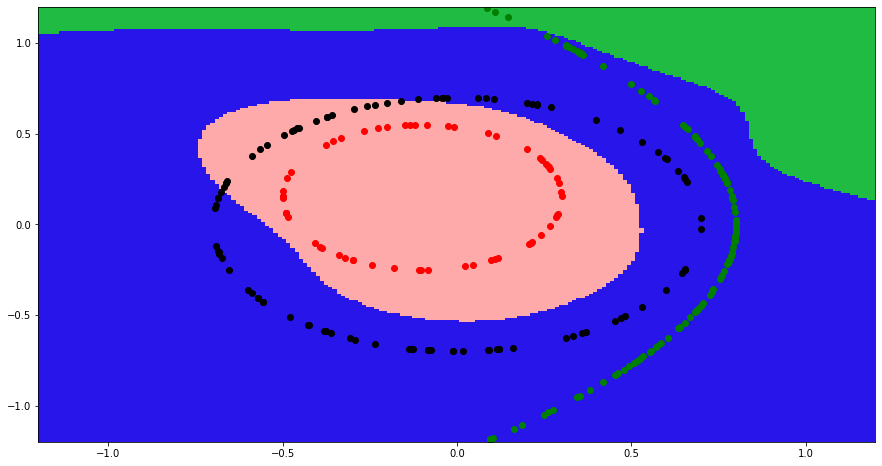

In [50]:
draw(model)

In [32]:
SPREAD = 0.1
model = PNN(verbose = True, std=SPREAD)
model.fit(X_train, y_train)


Main information

[ALGORITHM] PNN

[OPTION] batch_size = 128
[OPTION] std = 0.1
[OPTION] verbose = True



PNN(verbose=True, std=0.1, batch_size=128)

In [33]:
pred = model.predict(X_train)
print(accuracy_score(y_train, pred))

Time: 0:00:00 |N/A%|                                           | ETA:  --:--:--

0.9955357142857143


In [34]:
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.9821428571428571


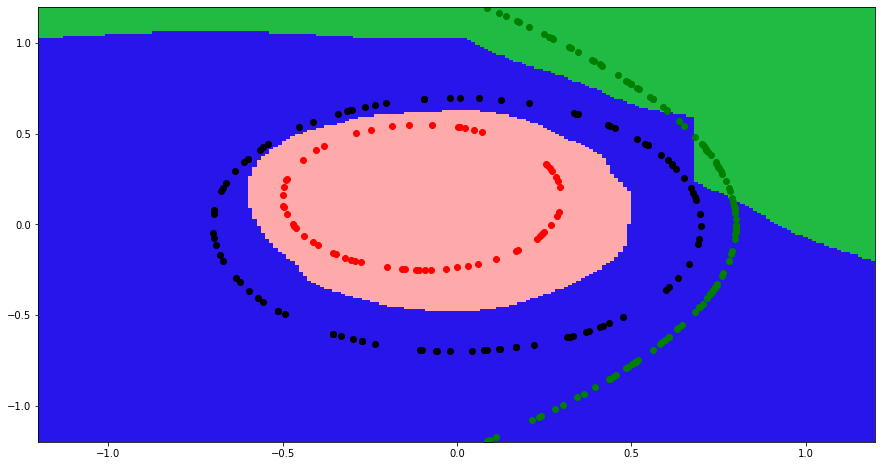

In [45]:
draw(model)

In [51]:
#2 задание
model2 = SVC(kernel = 'rbf', gamma=0.7) #1-0.3 = 0.7
model2.fit(X_train, y_train)

SVC(gamma=0.7)

In [52]:
pred = model2.predict(X_train)
print(accuracy_score(y_train, pred))

0.8794642857142857


In [53]:
pred = model2.predict(X_test)
print(accuracy_score(y_test, pred))

0.8392857142857143


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


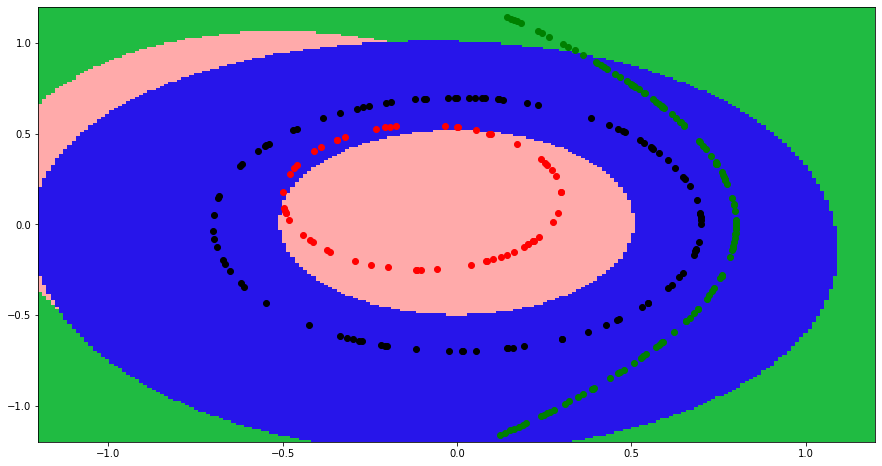

In [54]:
draw(model2)

In [55]:
model2 = SVC(kernel = 'rbf', gamma=0.9) #1-0.1 = 0.9
model2.fit(X_train, y_train)

SVC(gamma=0.9)

In [56]:
pred = model2.predict(X_train)
print(accuracy_score(y_train, pred))

0.8973214285714286


In [57]:
pred = model2.predict(X_test)
print(accuracy_score(y_test, pred))

0.8392857142857143


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


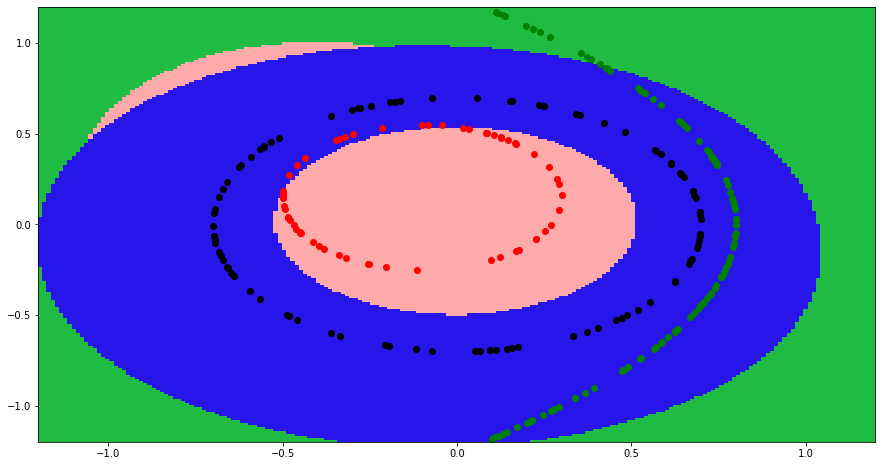

In [58]:
draw(model2)

In [85]:
#3 задание
def x_func(t):
  return np.sin(t * t - 10 * t + 3)

h = 0.025
tt = []
t = 1
YY = []
X = []
while t <= 6:
  tt.append(t)
  YY.append(round(x_func(t))) #целая часть числа
  X.append(x_func(t))
  t += h

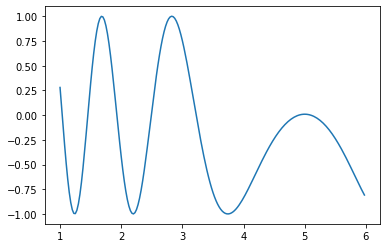

In [86]:
plt.plot(tt, X)

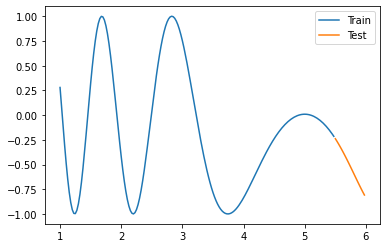

In [88]:
train_size = int(len(tt) * 0.9)

X_train = tt[:train_size]
y_train = X[:train_size]
plt.plot(X_train, y_train, label='Train')

X_test = tt[train_size:]
y_test = X[train_size:]

plt.plot(X_test, y_test, label = 'Test')
plt.legend()
plt.show()

In [89]:
SPREAD = h
model3 = GRNN(std=SPREAD, verbose = True)
model3.fit(X_train, y_train)


Main information

[ALGORITHM] GRNN

[OPTION] std = 0.025
[OPTION] verbose = True



GRNN(verbose=True, std=0.025)

RMSE = 0.005195594411127258
RMSE = 0.3483099150607264


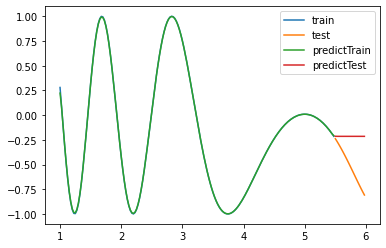

In [90]:
plt.plot(X_train, y_train, label='train')
plt.plot(X_test, y_test, label='test')

pred_x = model3.predict(X_train)
mse = sklearn.metrics.mean_squared_error(y_train, pred_x.flatten())
plt.plot(X_train, pred_x, label='predictTrain')
print(f'RMSE = {np.sqrt(mse)}')


pred_x = model3.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, pred_x.flatten())
plt.plot(X_test, pred_x, label='predictTest')
print(f'RMSE = {np.sqrt(mse)}')
plt.legend()
plt.show()